In [28]:
import tensorflow as tf
from tensorflow import keras
from src.model import StackedHourglassNetwork
import numpy as np

In [29]:
from src.loss import MSE
from src.metric.selected_metrics import selected_metrics as jsp
model = tf.keras.models.load_model('../8stack_20epoch/8stcks_20epch', compile=False)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss=keras.losses.mean_squared_error,
    metrics=[jsp, 'mae'],
    )
checkpoint_path = "../8stack_20epoch/training_1/cp-0003.ckpt"
model.load_weights(checkpoint_path)
# print(model.summary())

In [30]:
import matplotlib.pyplot as plt
test_image = tf.io.read_file('./practice/061185289.jpg')
test_image = tf.io.decode_image(test_image)

target_height = 256
target_width = 256

resized_image = tf.image.resize_with_pad(test_image, target_height, target_width)

In [31]:
result = model.predict(tf.expand_dims(resized_image, axis=0))
print(result.shape)
print(result.max())
print(result.min())

1/1 [==============================] - 2s 2s/step
(1, 256, 256, 16)
90.73217
-159.25717


(256, 256, 16)


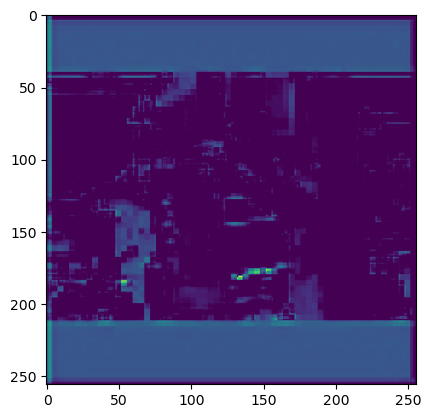

In [32]:
result_squeezed = tf.squeeze(result, axis=0)
print(result_squeezed.shape)
result_img = tf.reduce_sum(result_squeezed, axis=-1, keepdims=True)
result_img = tf.cast(result_img, dtype=tf.uint8)
plt.imshow(result_img)

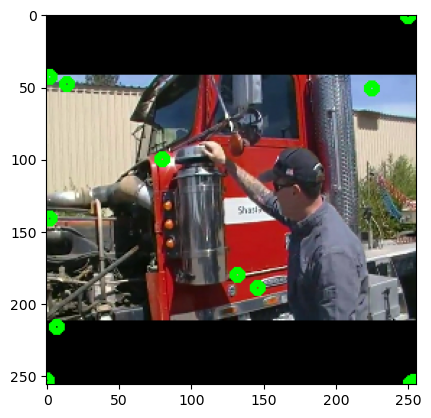

In [33]:
import cv2
vis_image = tf.cast(resized_image, dtype=tf.uint8).numpy()
for idx in range(result_squeezed.shape[-1]):
    one_prad = result_squeezed[:,:,idx]
    max_val = tf.reduce_max(one_prad, keepdims=True)
    cond = tf.equal(one_prad, max_val)
    res = tf.where(cond)[0]
    res = res.numpy()
    y, x = res[0], res[1]
    vis_image = cv2.circle(vis_image, (x,y), 3,(0,255,0), cv2.LINE_4) 
    #print(result_squeezed[:,:,1].numpy().max())
    #vis_image = cv2.circle(vis_image, (point[0], point[1]),3, 'red')

plt.imshow(vis_image)